# ガウス過程による回帰

線形回帰，カーネル回帰（RBFカーネル），ガウス過程による回帰を比較する

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

### 見本のデータ

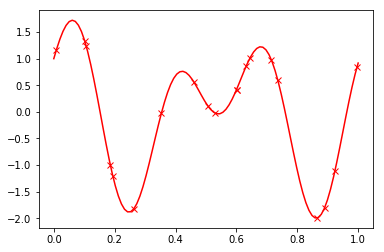

In [2]:
def f(x):
    a, b = 20, 11
    return np.sin(a*x) + np.cos(b*x)

n = 20
x = np.random.uniform(size=n)
y = f(x)
plt.plot(x, y, "rx")
plt.plot(np.linspace(0,1,100), f(np.linspace(0,1,100)), "r-")

### 多項式近似 正則化無し

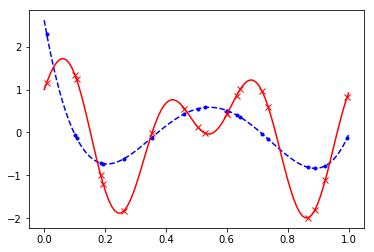

In [3]:
# 正則化なし
d = 5
v = np.array([x**i for i in range(d)])
w = np.ones(d)
u = y - np.dot(w, v)
p = np.dot(v, v.T)
w = np.dot(np.linalg.inv(p), v)
w = np.dot(w, y)

plt.plot(x, y, "rx")
plt.plot(x ,np.dot(v.T, w), "b.")

X = np.linspace(0,1,100)
plt.plot(X ,np.dot(np.array([X**i for i in range(d)]).T, w), "b--")
plt.plot(X, f(X), "r-")

### 多項式近似 正則化有り

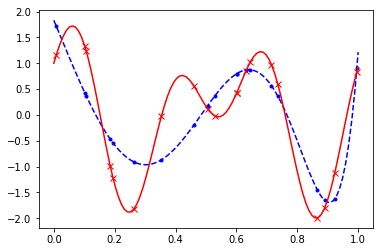

In [4]:
# 正則化あり
d, l = 10, 0.00001
v = np.array([x**i for i in range(d)])
w = np.ones(d)
u = y - np.dot(w, v)
p = np.dot(v, v.T)
w = np.dot(np.linalg.inv(p+l*np.eye(d)), v)
w = np.dot(w, y)

plt.plot(x, y, "rx")
plt.plot(x ,np.dot(v.T, w), "b.")
X = np.linspace(0,1,100)
plt.plot(X ,np.dot(np.array([X**i for i in range(d)]).T, w), "b--")
plt.plot(X, f(X), "r-")

### カーネル法 ガウスカーネルの定義

In [5]:
def gaussianKernel(x_row, x_col,alpha=1, beta=1):
    X_row, X_col = np.meshgrid(x_row,x_col)
    K = beta*np.exp(-alpha*np.sqrt((X_row - X_col)**2))
    return K

### カーネル回帰 ガウスカーネル

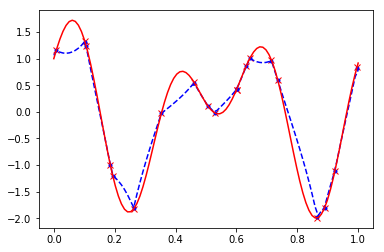

In [6]:
alpha, beta, l = 10, 10, 0.01
K = gaussianKernel(x,x,alpha)
w = np.linalg.inv(K+l*np.eye(n))
w = np.dot(w, y)

plt.plot(x, y, "rx")
plt.plot(x ,np.dot(w,K), "b.")
X = np.linspace(0,1,100)
plt.plot(X ,np.dot(w, gaussianKernel(X,x,alpha)), "b--")
plt.plot(X, f(X), "r-")

### 特徴関数の描画 ガウスカーネル

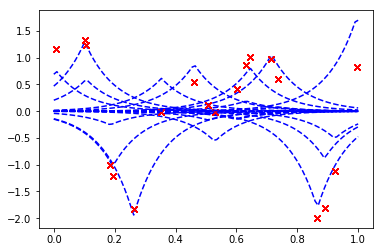

In [7]:
for i, w_ in enumerate(w):
    a = np.array([w_ if j == i else 0 for j in range(n)])
    X = np.linspace(0,1,100)
    plt.plot(x, y, "rx")
    plt.plot(X ,np.dot(a, gaussianKernel(X,x,alpha)), "b--")

### カーネル法 多項式カーネルの定義

In [8]:
def polyKernel(x_row, x_col, d=1, b=0):
    X_row, X_col = np.meshgrid(x_row,x_col)
    K = X_row*X_col
    K = (K + b*np.ones(K.shape))**d
    return K

### カーネル回帰 多項式カーネル

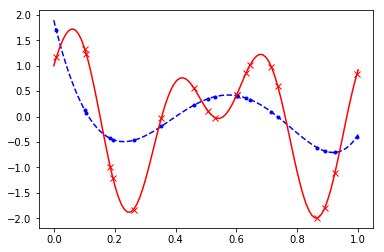

In [9]:
alpha, beta, l = 5, 1, 0.001
K = polyKernel(x,x,alpha, beta)
w = np.linalg.inv(K+l*np.eye(n))
w = np.dot(w, y)

plt.plot(x, y, "rx")
plt.plot(x ,np.dot(w,K), "b.")
X = np.linspace(0,1,100)
plt.plot(X ,np.dot(w, polyKernel(X,x,alpha, beta)), "b--")
plt.plot(X, f(X), "r-")

### 特徴関数の描画 多項式カーネル

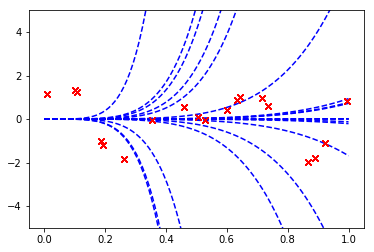

In [10]:
for i, w_ in enumerate(w):
    a = np.array([w_ if j == i else 0 for j in range(n)])
    X = np.linspace(0,1,100)
    plt.plot(x, y, "rx")
    plt.plot(X ,np.dot(a, polyKernel(X,x,alpha)), "b--")
    plt.ylim([-5, 5])

### ガウス過程回帰 RBFカーネル

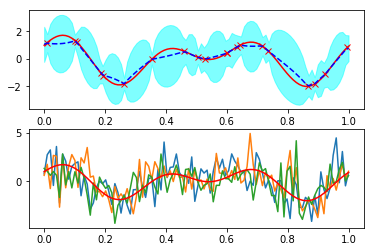

In [11]:
alpha, beta, gamma = 10, 10, .1
K_rbf = gaussianKernel(x, x, alpha, beta)
K_poly = polyKernel(x, x, alpha, beta)
C_rbf = K_rbf + gamma*np.eye(n)

X = np.linspace(0, 1, 100)
T = np.zeros((3, X.shape[0]))
mu = np.zeros(X.shape)
sig = np.zeros(X.shape)
for i,x_ in enumerate(X):
    k_rbf = gaussianKernel(x_, x, alpha, beta)
    c = gaussianKernel(x_, x_, alpha, beta)
    q = np.dot(k_rbf.T, np.linalg.inv(C_rbf))
    mu[i] = np.dot(q, y)
    sig[i] = c - np.dot(q, k_rbf)
    for j in range(3): T[j][i] = np.random.normal(mu[i], np.sqrt(sig[i]))

fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
ax1.plot(x, y, "rx")
ax1.plot(X ,f(X), "r-")
ax1.plot(X ,mu, "b--")
ax1.fill_between(X, mu - np.sqrt(sig), mu + np.sqrt(sig), color="cyan", alpha=0.5, label="predict_std")

for j in range(3): ax2.plot(X ,T[j], "-")
ax2.plot(X ,f(X), "r-")

### ガウス過程回帰 多項式カーネル

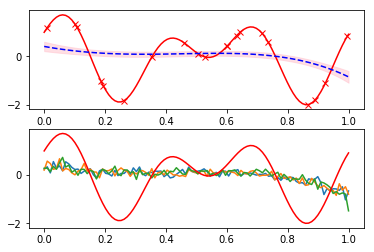

In [12]:
alpha, beta, gamma = 5, 1, 0.1
K_rbf = gaussianKernel(x, x, alpha, beta)
K_poly = polyKernel(x, x, alpha, beta)
C_poly = K_poly + gamma*np.eye(n)

X = np.linspace(0, 1, 100)
T = np.zeros((3, X.shape[0]))
# C_next = [np.zeros((n+1,n+1)) forv  x_ in X]
mu = np.zeros(X.shape)
sig = np.zeros(X.shape)
for i,x_ in enumerate(X):
    k_poly = polyKernel(x_, x, alpha, beta)
    c = polyKernel(x_, x_, alpha, beta)
    q = np.dot(k_poly.T, np.linalg.inv(C_poly))
    mu[i] = np.dot(q, y)
    sig[i] = c - np.dot(q, k_poly)
    for j in range(3): T[j][i] = np.random.normal(mu[i], np.sqrt(sig[i]))

fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
ax1.plot(x, y, "rx")
ax1.plot(X ,f(X), "r-")
ax1.plot(X ,mu, "b--")
ax1.fill_between(X, mu - np.sqrt(sig), mu + np.sqrt(sig), color="pink", alpha=0.5, label="predict_std")

for j in range(3): ax2.plot(X ,T[j], "-")
ax2.plot(X ,f(X), "r-")

### ガウス過程回帰 逐次確認

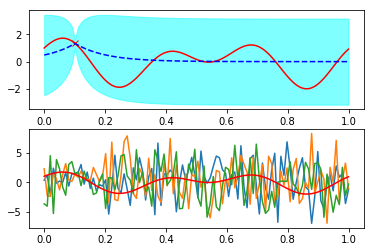

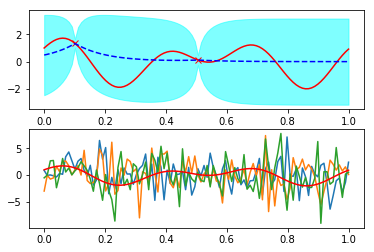

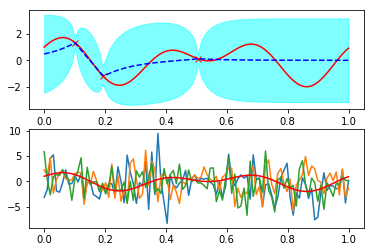

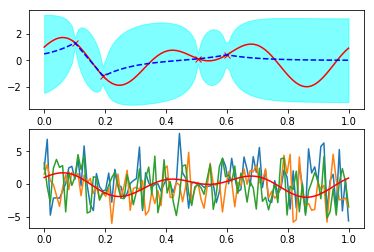

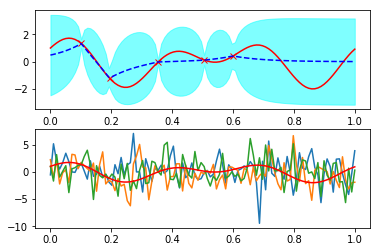

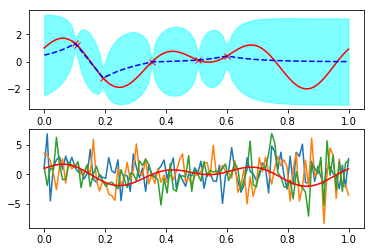

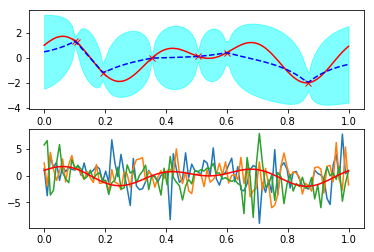

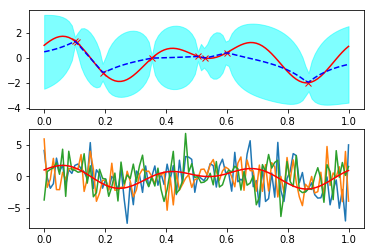

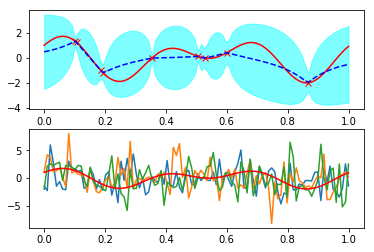

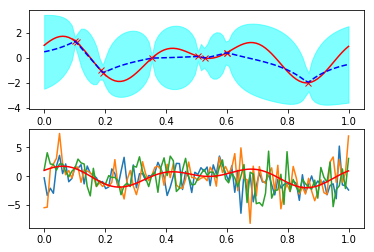

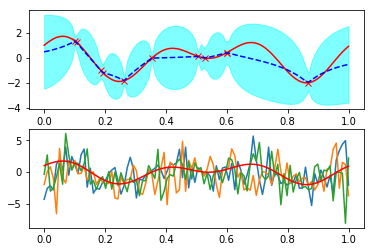

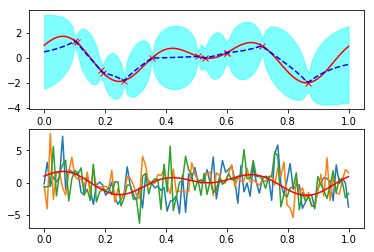

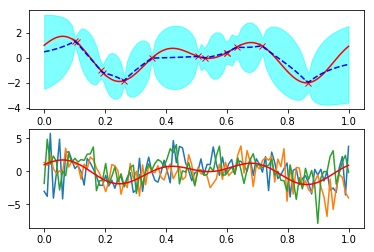

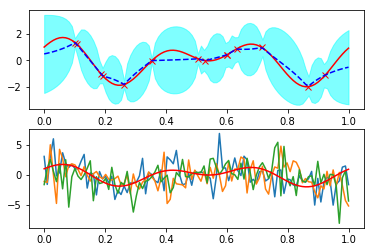

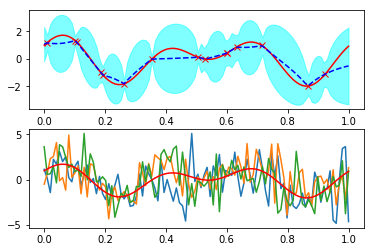

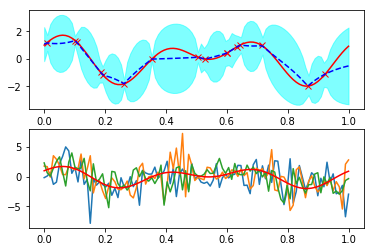

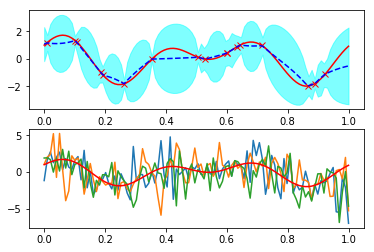

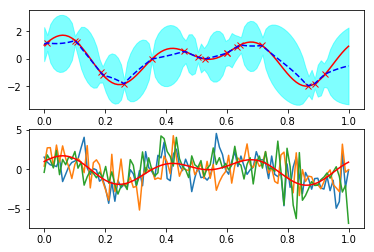

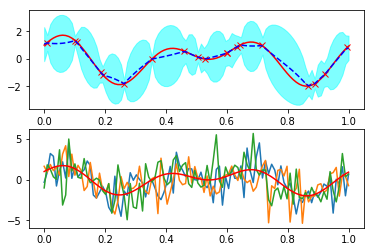

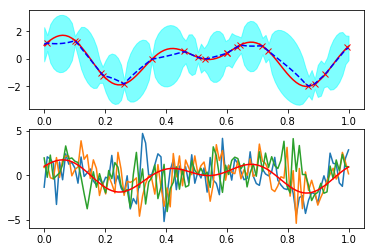

In [13]:
alpha, beta, gamma = 10, 10, 0.001

for j,x_s in enumerate(x):
    K_rbf = gaussianKernel(x[:j+1], x[:j+1], alpha, beta)
    C_rbf = K_rbf + gamma*np.eye(j+1)

    X = np.linspace(0, 1, 100)
    T = np.zeros((3, X.shape[0]))
    mu = np.zeros(X.shape)
    sig = np.zeros(X.shape)
    for i,x_ in enumerate(X):
        k_rbf = gaussianKernel(x_, x[:j+1], alpha, beta)
        c = gaussianKernel(x_, x_, alpha, beta)
        q = np.dot(k_rbf.T, np.linalg.inv(C_rbf))
        mu[i] = np.dot(q, y[:j+1])
        sig[i] = c - np.dot(q, k_rbf)
        for k in range(3): T[k][i] = np.random.normal(mu[i], np.sqrt(sig[i]))

    fig = plt.figure()
    ax1 = fig.add_subplot(211)
    ax2 = fig.add_subplot(212)
    ax1.plot(x[:j+1], y[:j+1], "rx")
    ax1.plot(X ,f(X), "r-")
    ax1.plot(X ,mu, "b--")
    ax1.fill_between(X, mu - np.sqrt(sig), mu + np.sqrt(sig), color="cyan", alpha=0.5, label="predict_std")

    for j in range(3): ax2.plot(X ,T[j], "-")
    ax2.plot(X ,f(X), "r-")